In [1]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pytorch_grad_cam import GradCAMPlusPlus, XGradCAM, EigenCAM, LayerCAM, HiResCAM, FullGrad, RandomCAM
# , AblationCAM
from CAM.ablation_cam import AblationCAM
from CAM.score_cam import ScoreCAM
from CAM.grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import scale_cam_image
from utils import *

In [2]:
model = models.vgg16(pretrained=True)
model.eval()
model = model.to('cuda')

/home/khmt/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/khmt/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
import os

def get_file_paths(folder_path):
    files = os.listdir(folder_path)
    return files

# Đường dẫn đến thư mục chứa các tệp
folder_path = '../ILSVRC2012_val_folders'
file_paths = get_file_paths(folder_path)

In [4]:
image_path = f"../ILSVRC2012_val_folders/{file_paths[1]}"
image_tensor = input_link(image_path)
image_tensor = image_tensor.to('cuda')
yhat = model(image_tensor)
result = predict_decode(yhat)

('drake', 0.9999995231628418)
('red-breasted merganser', 2.1370368585849064e-07)
('bee eater', 1.261728641566151e-07)
('European gallinule', 4.860770275172399e-08)
('peacock', 3.184392483035481e-08)


In [5]:
label = result[1]
target_layers = [model.features[-1]]
targets = [ClassifierOutputTarget(label)]
# Load the image
img = cv2.imread(image_path)
resized_img = cv2.resize(img, (224, 224))
# Convert BGR to RGB (OpenCV loads images as BGR by default)
img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

In [6]:
model_CAM = ScoreCAM
cam = model_CAM(model=model, target_layers=target_layers)
grayscale_cam = cam(input_tensor=image_tensor, targets=None)
grayscale_cam = grayscale_cam[0, :]
grayscale_cam.shape

init basecan
__call__
tar : [<pytorch_grad_cam.utils.model_targets.ClassifierOutputTarget object at 0x728e8cfd2530>]


 25%|██▌       | 1/4 [00:00<00:01,  2.65it/s]

[4.091033935546875, 12.157288551330566, 7.566596984863281, 5.482579231262207, 5.875058174133301, 6.086858749389648, 3.098515510559082, 11.84981632232666, 3.346958637237549, 14.858194351196289, 18.049135208129883, 0.28018641471862793, 12.434165954589844, 2.4620375633239746, 17.840789794921875, 10.496728897094727, 9.248809814453125, 7.19573974609375, 3.535170316696167, 13.200515747070312, -0.39333951473236084, 5.42692756652832, 8.996322631835938, 5.299127101898193, 4.94264554977417, -2.169541597366333, 16.905092239379883, 10.36878490447998, 16.72602081298828, 3.4372143745422363, 7.7948713302612305, 1.1128312349319458, 2.537876844406128, 3.5902044773101807, 1.1339458227157593, 2.9775447845458984, 5.334050178527832, 1.8759315013885498, 2.195040702819824, 2.980940818786621, 2.0473127365112305, 8.931926727294922, 11.214841842651367, 6.506793975830078, 15.904918670654297, -2.169541597366333, 7.395573616027832, 9.454262733459473, 10.125445365905762, 1.4882729053497314, 6.09468936920166, 8.8058

 50%|█████     | 2/4 [00:00<00:00,  2.76it/s]

[7.87922477722168, 3.0790250301361084, 5.644867897033691, -1.6283648014068604, 0.6417498588562012, -0.33997058868408203, 9.694869995117188, 3.8651483058929443, 3.8583903312683105, 15.145090103149414, -2.1550939083099365, 9.835308074951172, -0.7299758791923523, 5.475205421447754, 1.1097042560577393, 11.048242568969727, -0.20412613451480865, 13.975790977478027, 10.180065155029297, 9.15450668334961, -0.8910094499588013, -2.169541597366333, 18.85808563232422, -2.061652183532715, 12.482141494750977, 9.736997604370117, 1.644217610359192, 0.3179836869239807, 2.463083267211914, 8.346033096313477, 7.064698696136475, 12.119269371032715, 5.794206142425537, 8.821168899536133, 24.434436798095703, 3.255431890487671, 7.927581787109375, 12.524163246154785, 1.8602783679962158, 6.642907619476318, 14.103212356567383, 20.14342498779297, -0.4718238115310669, 1.5761990547180176, 1.946333646774292, 3.979027271270752, 2.842683792114258, 11.144837379455566, 20.306543350219727, 6.028007507324219, 9.839861869812

 75%|███████▌  | 3/4 [00:01<00:00,  2.80it/s]

[-2.169541597366333, 6.049668788909912, 4.330893516540527, 2.1319079399108887, 27.021656036376953, -0.9183213710784912, 2.144946575164795, 0.9507982134819031, 11.635656356811523, -1.167208194732666, 16.969219207763672, 2.8327507972717285, -1.1888422966003418, 5.994232177734375, 5.323871612548828, 2.591176748275757, 18.004791259765625, 0.38665536046028137, 5.2543206214904785, 3.0623466968536377, 18.389352798461914, -1.466001033782959, 7.2609429359436035, 0.9255341291427612, -1.6204729080200195, 4.5206451416015625, 8.254392623901367, 5.641184329986572, 2.0916523933410645, -1.2924214601516724, 6.379621505737305, 12.439373016357422, -2.169541597366333, -0.5379679203033447, 11.81770133972168, -2.4548850059509277, 1.9057331085205078, 1.3121604919433594, 3.2891135215759277, 4.8503923416137695, 15.531243324279785, 0.2919081449508667, 7.904160976409912, 14.576333045959473, 11.35985279083252, 3.9907174110412598, 6.384066581726074, 4.145040512084961, 2.695617914199829, 19.895679473876953, 1.70102

100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

[5.346291542053223, 1.1011419296264648, -2.169541597366333, 15.730432510375977, -2.169541597366333, 8.78175163269043, 12.034025192260742, 0.1396392285823822, 16.092544555664062, -1.2043373584747314, 4.455476760864258, 0.12942127883434296, -0.23072555661201477, 8.82824993133545, -2.169541597366333, 4.475253105163574, 8.15774154663086, -1.5811063051223755, 5.253841400146484, 3.7110695838928223, 9.984565734863281, 8.204732894897461, 5.152748107910156, 2.2302956581115723, 5.136208534240723, 1.8457545042037964, 9.409660339355469, -2.169541597366333, 20.09398651123047, 9.382484436035156, 5.616604804992676, 2.863518714904785, 18.99065399169922, 5.388782501220703, 10.471031188964844, 0.9093748331069946, 15.626619338989258, 9.642333984375, 4.784156322479248, 3.519557476043701, 0.23739665746688843, -1.5909357070922852, -2.169541597366333, 11.21809196472168, 3.678938388824463, -2.249267101287842, 6.078777313232422, 5.109766960144043, 7.376087188720703, -0.8288188576698303, 9.408807754516602, 3.62

(224, 224)

In [7]:
cam.get_activations_and_grads()
outputs = cam.activations_and_grads(image_tensor)

In [8]:
outputs.shape

torch.Size([1, 1000])

In [9]:
activations_list = cam.get_activations_list()
grads_list = cam.get_grads_list()

In [10]:
grads_list

[]

In [11]:
activations_scale = scale_cam_image(activations_list[0][0], (224,224))
# grads_scale = scale_cam_image(grads_list[0][0], (224,224))
activations_scale.shape

(512, 224, 224)

In [12]:
# argmax_indices = np.argmax(grads_scale, axis=0)
# plt.imshow(argmax_indices, cmap='viridis')  # Displaying the array as an image
# plt.colorbar()  # Adding a color bar for reference
# plt.show()

In [13]:
# l = list(set(argmax_indices.flatten().tolist()))

In [14]:
# fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# visualization = show_cam_on_image(img, np.argmax(grads_scale, axis=0), use_rgb=True)
# # visualization = show_cam_on_image(img, grayscale_cam, use_rgb=True)
# axs[0].imshow(np.argmax(grads_scale, axis=0))
# axs[0].axis('off')  # Hide axes
# axs[1].imshow(img)
# # axs[k, 1].set_title(f"grads_visualization", fontsize=10)
# axs[1].axis('off')  # Hide axes
# axs[2].imshow(visualization)
# # axs[k, 1].set_title(f"grads_visualization", fontsize=10)
# axs[2].axis('off')  # Hide axes

In [15]:
arr = cam.get_weights()[0]

l = np.argpartition(arr, -10)[-10:]
print(l)

[102 485  93 162 237 260 115 497 360 207]


(-0.5, 223.5, 223.5, -0.5)

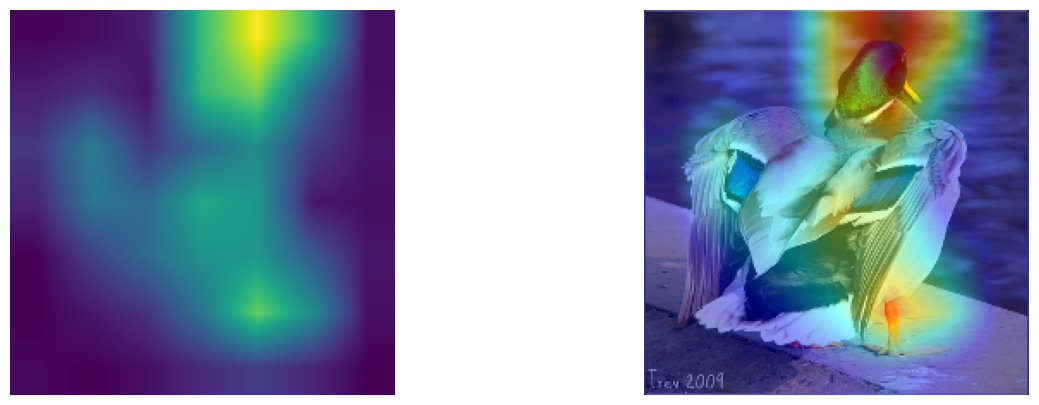

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
visualization = show_cam_on_image(img, grayscale_cam, use_rgb=True)
axs[0].imshow(grayscale_cam)
axs[0].axis('off')  # Hide axes
axs[1].imshow(visualization)
# axs[k, 1].set_title(f"grads_visualization", fontsize=10)
axs[1].axis('off')  # Hide axes

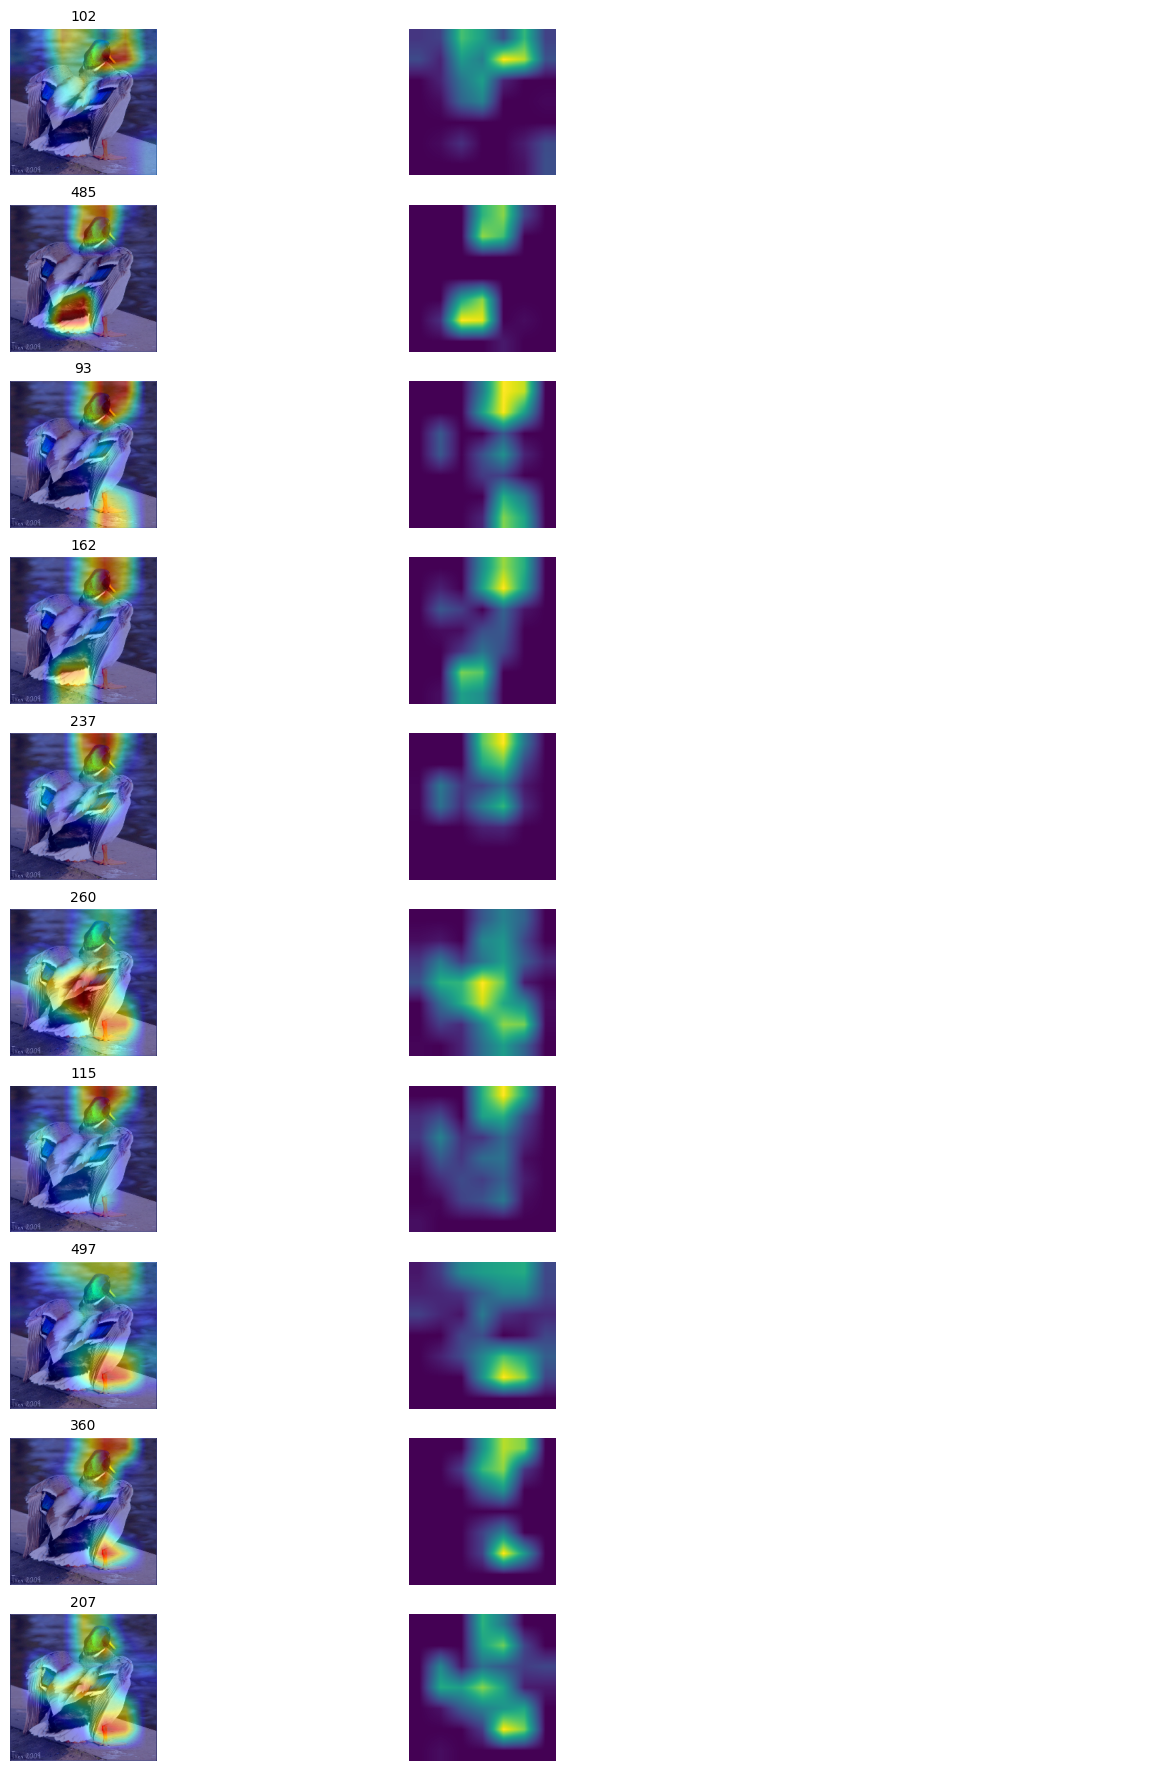

In [17]:
# l = list(range(0, 100 + 1))
u = len(l)
fig, axs = plt.subplots(u, 6, figsize=(15, 5*(u-1)/2))
for i, k in enumerate(l):
    
    activations_visualization = show_cam_on_image(img, activations_scale[k], use_rgb=True)
    # grads_visualization = show_cam_on_image(img, grads_scale[k], use_rgb=True)
    # total_visualization = show_cam_on_image(img, activations_scale[k]*grads_scale[k], use_rgb=True)

    axs[i, 0].imshow(activations_visualization)
    axs[i, 0].set_title(f"{k}", fontsize=10)
    axs[i, 0].axis('off')  # Hide axes
    # axs[i, 1].imshow(grads_visualization)
    # axs[k, 1].set_title(f"grads_visualization", fontsize=10)
    axs[i, 1].axis('off')  # Hide axes
    axs[i, 2].imshow(activations_scale[k])
    # axs[k, 0].set_title(f"activations_visualization", fontsize=10)
    axs[i, 2].axis('off')  # Hide axes
    # axs[i, 3].imshow(grads_scale[k])
    # axs[k, 0].set_title(f"activations_visualization", fontsize=10)
    axs[i, 3].axis('off')  # Hide axes
    # axs[i, 4].imshow(activations_scale[k]*grads_scale[k])
    # axs[k, 0].set_title(f"activations_visualization", fontsize=10)
    axs[i, 4].axis('off')  # Hide axes
    # axs[i, 5].imshow(total_visualization)
    # axs[k, 0].set_title(f"activations_visualization", fontsize=10)
    axs[i, 5].axis('off')  # Hide axes
plt.show()

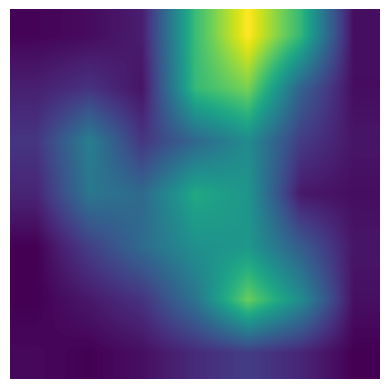

In [18]:
plt.imshow(grayscale_cam)
plt.axis('off')  # Hide axes
plt.show()

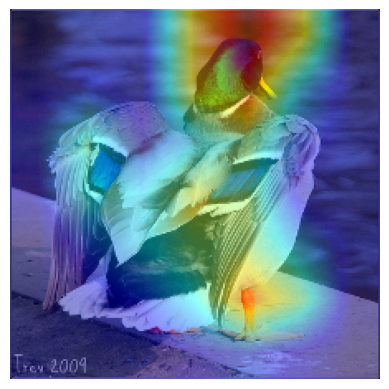

In [19]:
visualization = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(visualization)
plt.axis('off')  # Hide axes
plt.show()

In [20]:
# fig, axs = plt.subplots(32, 16, figsize=(10, 5))

# model_CAM = [GradCAM, ScoreCAM, GradCAMPlusPlus, XGradCAM, EigenCAM, LayerCAM, AblationCAM, HiResCAM, FullGrad, RandomCAM]
# # Load and display each image
# for i in range(32):
#     for j in range(16):
#         # Load the image (replace this with your image loading code)
#         # print(model_CAM[5*i+j])
#         index = 16*i+j
#         image = show_cam_on_image(img, scale[index], use_rgb=True)
#         # Display the image
#         axs[i, j].imshow(image)
#         axs[i, j].set_title(f"{index}", fontsize=10)
#         axs[i, j].axis('off')  # Hide axes
# path = f'images_test/test.png'  # Change this to your desired file path
# plt.savefig(path)